In [1]:
from astropy.table import Table
import numpy as np
from The_Payne import process_galah_spectra
from The_Payne import utils

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import matplotlib.pyplot as plt

In [2]:
wavelength = utils.load_wavelength_array(survey='galah')

In [3]:
galah_dr3 = Table.read('/avatar/buder/trunk/GALAH/GALAH_DR3/catalogs/GALAH_iDR3_main_alpha_190529.fits')

In [4]:
selection = (
    (galah_dr3['snr_c2_iraf'] > 200) & 
    (galah_dr3['teff'] < 7000) & 
    (galah_dr3['parallax']/galah_dr3['parallax_error'] > 20) &
    (galah_dr3['flag_sp'] == 0) &
    (galah_dr3['alpha_fe'] > -0.1) & (galah_dr3['alpha_fe'] < 0.6)
    )
print(np.shape(galah_dr3['sobject_id'][selection]))

(1161,)


/pkg/linux/anaconda2/lib/python2.7/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)
/pkg/linux/anaconda2/lib/python2.7/site-packages/astropy/table/column.py:954: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


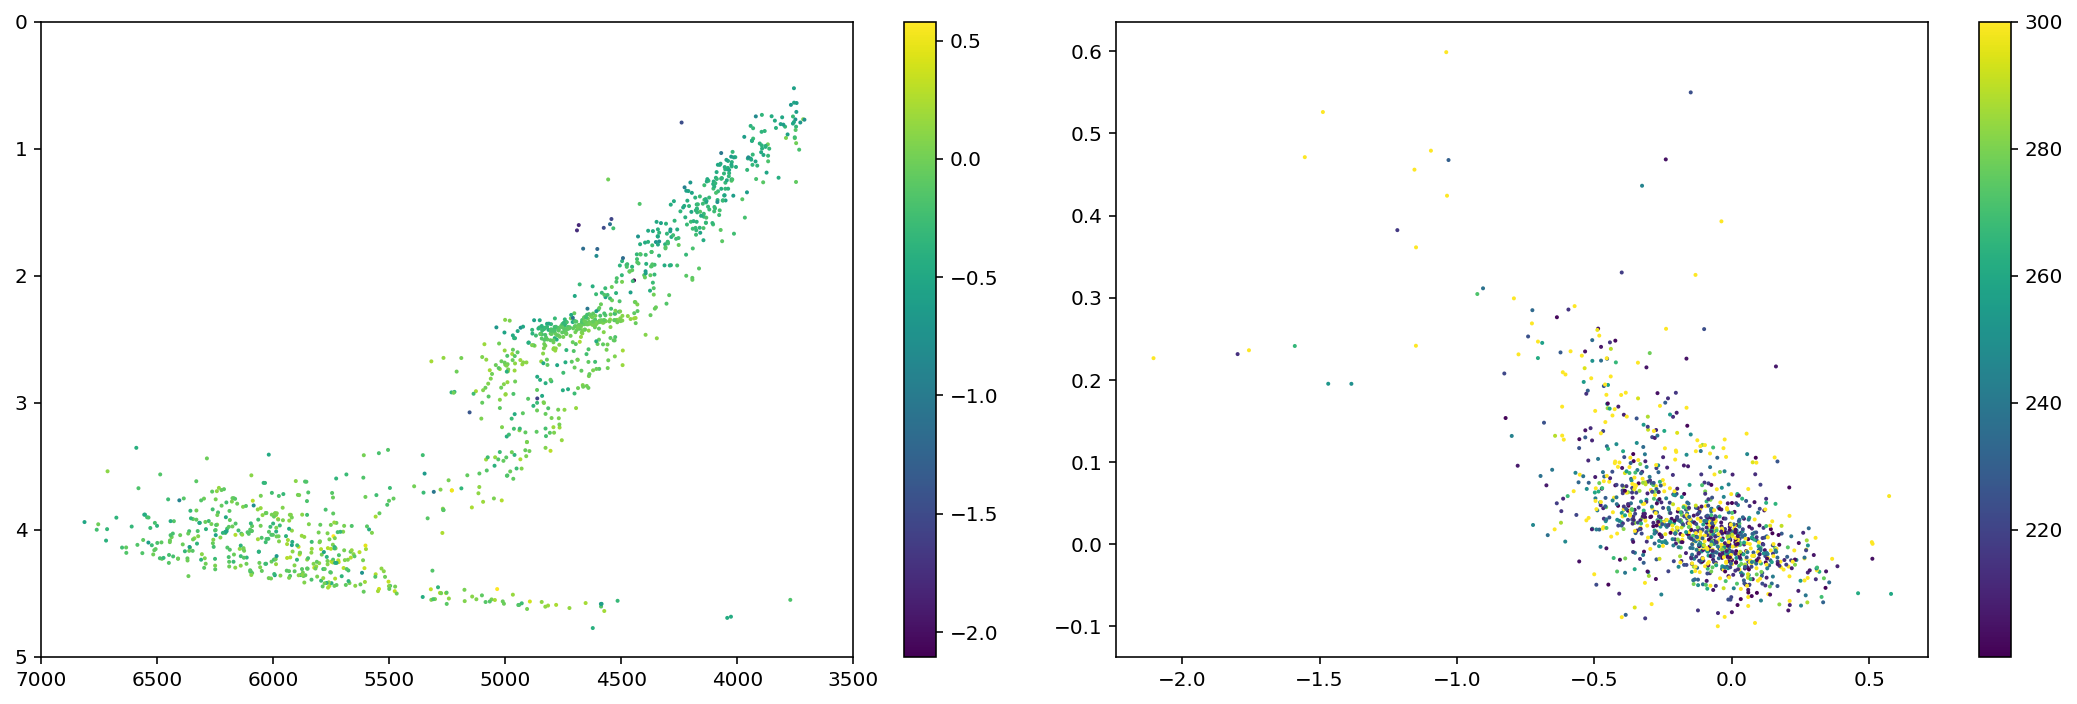

In [5]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
s1 = ax1.scatter(
    galah_dr3['teff'][selection],
    galah_dr3['logg'][selection],
    c=galah_dr3['fe_h'][selection],
    s=1
    )
plt.colorbar(s1, ax=ax1)
ax1.set_xlim(7000,3500)
ax1.set_ylim(5,0)

s2 = ax2.scatter(
    galah_dr3['fe_h'][selection],
    galah_dr3['alpha_fe'][selection],
    c=galah_dr3['snr_c2_iraf'][selection],
    s=1,vmax=300
    )
plt.colorbar(s2, ax=ax2)
plt.tight_layout()

In [6]:
output_flux = np.ones((np.shape(galah_dr3['sobject_id'][selection])[0],np.shape(wavelength)[0]), dtype=np.float64)
output_flux_error = np.ones((np.shape(galah_dr3['sobject_id'][selection])[0],np.shape(wavelength)[0]), dtype=np.float64)
output_labels = np.array([galah_dr3['teff'][selection],galah_dr3['logg'][selection],galah_dr3['fe_h'][selection],galah_dr3['alpha_fe'][selection]])

In [7]:
np.shape(output_flux),np.shape(output_labels)

((1161, 14304), (4, 1161))

In [8]:
for each_index, sobject_id in enumerate(galah_dr3['sobject_id'][selection]):
    if each_index%50==0:
        print(each_index)
    try:
        flux, flux_error = process_galah_spectra.get_galah_spectrum_on_payne_scale(sobject_id = sobject_id)
        output_flux[each_index] = flux
        output_flux_error[each_index] = flux_error
    except:
        print('not found: '+str(sobject_id))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150


In [9]:
np.savez('galah_selection_191030.npz', sobject_id = np.array(galah_dr3['sobject_id'][selection]), labels=output_labels, flux=output_flux, flux_error=output_flux_error)

In [10]:
tmp = np.load('galah_selection_191030.npz')

In [17]:
np.shape(tmp['labels'])

(4, 1161)

In [11]:
np.where(np.isfinite(tmp['sobject_id'])==False)

(array([], dtype=int64),)

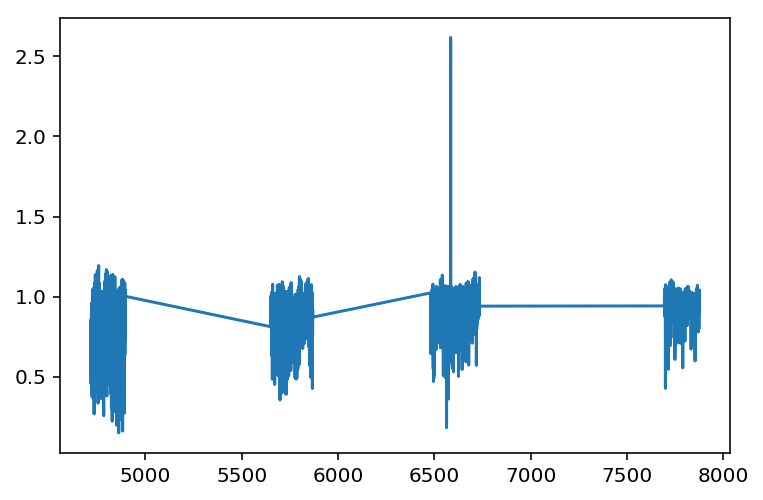

In [14]:
plt.plot(wavelength,tmp['flux'][0])

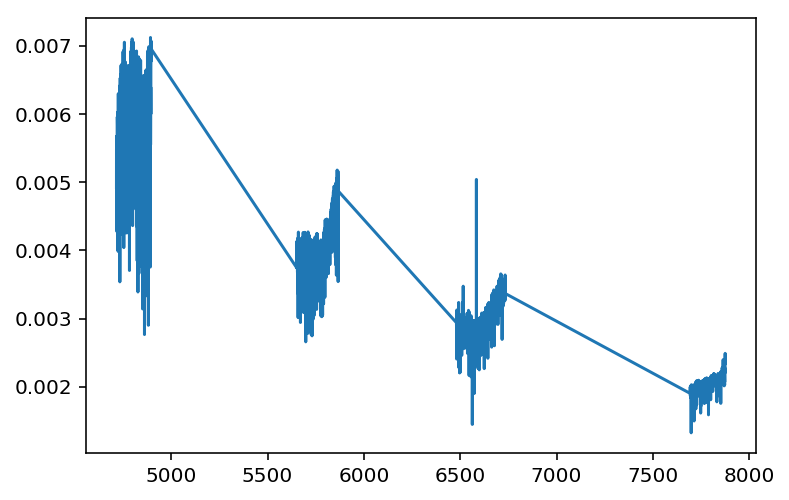

In [15]:
plt.plot(wavelength,tmp['flux_error'][0])